<a href="https://colab.research.google.com/github/06Cata/Kaggle_Titanic/blob/main/Kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境準備

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

# 讀取資料

In [ ]:
url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/train.csv'

df_train = pd.read_csv(url)

df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

# 初步查看個欄位與'Survived'關係
##　數值型、沒缺少值才可

In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Pclass
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# 計算密度估計
pclass_not_survived = df_train[df_train['Survived'] == 0]['Pclass']
pclass_survived = df_train[df_train['Survived'] == 1]['Pclass']

kde_not_survived = gaussian_kde(pclass_not_survived)
kde_survived = gaussian_kde(pclass_survived)

# 設置範圍
pclass_range = np.linspace(0, df_train['Pclass'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(pclass_range)
density_survived = kde_survived(pclass_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=pclass_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=pclass_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Pclass by Survival Status',
    xaxis_title='Pclass',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [ ]:
# SibSp

# 計算密度估計
sibsp_not_survived = df_train[df_train['Survived'] == 0]['SibSp']
sibsp_survived = df_train[df_train['Survived'] == 1]['SibSp']

kde_not_survived = gaussian_kde(sibsp_not_survived)
kde_survived = gaussian_kde(sibsp_survived)

# 設置範圍
sibsp_range = np.linspace(0, df_train['SibSp'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(sibsp_range)
density_survived = kde_survived(sibsp_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sibsp_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sibsp_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of SibSp by Survival Status',
    xaxis_title='SibSp',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()



In [ ]:
# Parch

# 計算密度估計
parch_not_survived = df_train[df_train['Survived'] == 0]['Parch']
parch_survived = df_train[df_train['Survived'] == 1]['Parch']

kde_not_survived = gaussian_kde(parch_not_survived)
kde_survived = gaussian_kde(parch_survived)

# 設置範圍
parch_range = np.linspace(0, df_train['Parch'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(parch_range)
density_survived = kde_survived(parch_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=parch_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=parch_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Parch by Survival Status',
    xaxis_title='Parch',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()



In [ ]:
# Fare
from scipy.stats import gaussian_kde

# 計算密度估計
fare_not_survived = df_train[df_train['Survived'] == 0]['Fare']
fare_survived = df_train[df_train['Survived'] == 1]['Fare']

kde_not_survived = gaussian_kde(fare_not_survived)
kde_survived = gaussian_kde(fare_survived)

# 設置範圍
fare_range = np.linspace(0, df_train['Fare'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(fare_range)
density_survived = kde_survived(fare_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=fare_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=fare_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Fare by Survival Status',
    xaxis_title='Fare',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


# 資料清理

In [ ]:
print((df_train['Cabin'].isna().sum()/df_train.shape[0]*100).round(2))

# age 用性別、艙等平均補
# Cabin 刪除，缺少 77%
# Embarked 用眾數補

# sex轉為One-Hot
# Embarked轉為One-Hot

77.1


In [ ]:
print(df_train['Ticket'].value_counts())
# 不使用

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


In [ ]:
# Age，用性別、艙等平均補
df_train['Age'].fillna(value=df_train.groupby(['Sex','Pclass'])['Age'].transform('mean'),inplace=True)
df_train

C:\Users\catal\AppData\Local\Temp\ipykernel_24644\1059749592.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
# Embarked，用眾數補
mode_embarked = df_train['Embarked'].mode()[0]

df_train['Embarked'].fillna(value=mode_embarked, inplace=True)
df_train

C:\Users\catal\AppData\Local\Temp\ipykernel_24644\1997391581.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
# 確認一下
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# 特徵工程

In [ ]:
# 年齡多一欄，設為年齡組

bins = [0, 21, 65, 100]
labels = ['0-21', '22-65', '66-100']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_train['AgeGroup'] = df_train['AgeGroup'].cat.codes  # 轉換為數值

df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  AgeGroup  
0        0         A/5 21171   7.2500   NaN        S         1  
1        0          PC 17599  71.2833   C85        C         1  
2        0  STON/O2. 3101282   7.9250   NaN        S         1  
3        0            113803  53.1000  C123        S         1  
4        0            373450   8.0500   NaN        S         1  
..     ...               ...      ...   ...      ...       ...  
886      0            211536  13.0000   NaN        S         1  
887      0            112053  30.0000   B42        S         0  
888      2        W./C. 6607  23.4500   NaN        S         1  
889      0            111369  30.0000  C148        C         1  
890      0            370376   7.7500   NaN        Q         1  

[891 rows x 13 columns]

In [ ]:
# 家屬多設一欄，總親屬人數

df_train['Family_size']	= df_train['SibSp'].astype(int) + df_train['Parch'].astype(int) + 1

df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  AgeGroup  Family_size  
0        0         A/5 21171   7.2500   NaN        S         1            2  
1        0          PC 17599  71.2833   C85        C         1            2  
2        0  STON/O2. 3101282   7.9250   NaN        S         1            1  
3        0            113803  53.1000  C123        S         1            2  
4        0            373450   8.0500   NaN        S         1            1  
..     ...               ...      ...   ...      ...       ...          ...  
886      0            211536  13.0000   NaN        S         1            1  
887      0            112053  30.0000   B42        S         0            1  
888      2        W./C. 6607  23.4500   NaN        S         1            4  
889      0            111369  30.0000  C148        C         1            1  
890      0            370376   7.7500   NaN        Q         1            1  

[891 rows x 14 columns]

In [ ]:
# df_train_2，複製一張表
# Sex、Embarked轉為One-Hot

df_train_2 = df_train.copy()
df_train_2['Sex_new'] = df_train_2['Sex'].copy()
df_train_2['Embarked_new'] = df_train_2['Embarked'].copy()
df_train_2 = pd.get_dummies(df_train_2, columns=['Sex_new', 'Embarked_new'], prefix=['Sex_new', 'Embarked_new'])

df_train_2['Sex_new_female'] = df_train_2['Sex_new_female'].astype(int)
df_train_2['Sex_new_male'] = df_train_2['Sex_new_male'].astype(int)
df_train_2['Embarked_new_C'] = df_train_2['Embarked_new_C'].astype(int)
df_train_2['Embarked_new_Q'] = df_train_2['Embarked_new_Q'].astype(int)
df_train_2['Embarked_new_S'] = df_train_2['Embarked_new_S'].astype(int)

df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  AgeGroup  Family_size  \
0        0         A/5 21171   7.2500   NaN        S         1            2   
1        0          PC 17599  71.2833   C85        C         1            2   
2        0  STON/O2. 3101282   7.9250   NaN        S         1            1   
3        0            113803  53.1000  C123        S         1            2   
4        0            373450   8.0500   NaN        S         1            1   
..     ...               ...      ...   ...      ...       ...          ...   
886      0            211536  13.0000   NaN        S         1            1   
887      0            112053  30.0000   B42        S         0            1   
888      2        W./C. 6607  23.4500   NaN        S         1            4   
889      0            111369  30.0000  C148        C         1            1   
890      0            370376   7.7500   NaN        Q         1            1   

     Sex_new_female  Sex_new_male  Embarked_new_C  Embarked_new_Q  \
0                 0             1               0               0   
1                 1             0               1               0   
2                 1             0               0               0   
3                 1             0               0               0   
4                 0             1               0               0   
..              ...           ...             ...             ...   
886               0             1               0               0   
887               1             0               0               0   
888               1             0               0               0   
889               0             1               1               0   
890               0             1               0               1   

     Embarked_new_S  
0                 1  
1                 0  
2                 1  
3                 1  
4                 1  
..              ...  
886               1  
887               1  
888               1  
889               0  
890               0  

[891 rows x 19 columns]

In [ ]:
# Sex、Embarked轉為LabelEncoder

# !pip install category_encoders
# from category_encoders.target_encoder import TargetEncoder
# target_encoder = TargetEncoder()
# df_train['Embarked'] = target_encoder.fit_transform(df_train['Embarked'])

from sklearn.preprocessing import LabelEncoder

label_encoder_sex_labeled = LabelEncoder()
df_train_2['Sex_labeled'] = label_encoder_sex_labeled.fit_transform(df_train_2['Sex'])

label_encoder_embarked_labeled = LabelEncoder()
df_train_2['Embarked_labeled'] = label_encoder_embarked_labeled.fit_transform(df_train_2['Embarked'])

df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare  ... Embarked AgeGroup  Family_size  \
0        0         A/5 21171   7.2500  ...        S        1            2   
1        0          PC 17599  71.2833  ...        C        1            2   
2        0  STON/O2. 3101282   7.9250  ...        S        1            1   
3        0            113803  53.1000  ...        S        1            2   
4        0            373450   8.0500  ...        S        1            1   
..     ...               ...      ...  ...      ...      ...          ...   
886      0            211536  13.0000  ...        S        1            1   
887      0            112053  30.0000  ...        S        0            1   
888      2        W./C. 6607  23.4500  ...        S        1            4   
889      0            111369  30.0000  ...        C        1            1   
890      0            370376   7.7500  ...        Q        1            1   

     Sex_new_female  Sex_new_male  Embarked_new_C  Embarked_new_Q  \
0                 0             1               0               0   
1                 1             0               1               0   
2                 1             0               0               0   
3                 1             0               0               0   
4                 0             1               0               0   
..              ...           ...             ...             ...   
886               0             1               0               0   
887               1             0               0               0   
888               1             0               0               0   
889               0             1               1               0   
890               0             1               0               1   

     Embarked_new_S  Sex_labeled  Embarked_labeled  
0                 1            1                 2  
1                 0            0                 0  
2                 1            0                 2  
3                 1            0                 2  
4                 1            1                 2  
..              ...          ...               ...  
886               1            1                 2  
887               1            0                 2  
888               1            0                 2  
889               0            1                 0  
890               0            1                 1  

[891 rows x 21 columns]

In [ ]:
# 'Sex' 列的標籤對應關係
sex_mapping = dict(zip(label_encoder_sex_labeled.classes_, label_encoder_sex_labeled.transform(label_encoder_sex_labeled.classes_)))
print("Sex mapping:", sex_mapping)

# 'Embarked' 列的標籤對應關係
embarked_mapping = dict(zip(label_encoder_embarked_labeled.classes_, label_encoder_embarked_labeled.transform(label_encoder_embarked_labeled.classes_)))
print("Embarked mapping:", embarked_mapping)

Sex mapping: {'female': 0, 'male': 1}
Embarked mapping: {'C': 0, 'Q': 1, 'S': 2}


In [ ]:
# 提取名字中的頭銜
df_train_2['Title'] = df_train_2['Name'].str.split(", ", expand=True)[1]
df_train_2['Title_2'] = df_train_2['Title'].str.split(". ", expand=True)[0]
df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare  ... Family_size Sex_new_female  \
0        0         A/5 21171   7.2500  ...           2              0   
1        0          PC 17599  71.2833  ...           2              1   
2        0  STON/O2. 3101282   7.9250  ...           1              1   
3        0            113803  53.1000  ...           2              1   
4        0            373450   8.0500  ...           1              0   
..     ...               ...      ...  ...         ...            ...   
886      0            211536  13.0000  ...           1              0   
887      0            112053  30.0000  ...           1              1   
888      2        W./C. 6607  23.4500  ...           4              1   
889      0            111369  30.0000  ...           1              0   
890      0            370376   7.7500  ...           1              0   

     Sex_new_male  Embarked_new_C  Embarked_new_Q  Embarked_new_S  \
0               1               0               0               1   
1               0               1               0               0   
2               0               0               0               1   
3               0               0               0               1   
4               1               0               0               1   
..            ...             ...             ...             ...   
886             1               0               0               1   
887             0               0               0               1   
888             0               0               0               1   
889             1               1               0               0   
890             1               0               1               0   

     Sex_labeled  Embarked_labeled  \
0              1                 2   
1              0                 0   
2              0                 2   
3              0                 2   
4              1                 2   
..           ...               ...   
886            1                 2   
887            0                 2   
888            0                 2   
889            1                 0   
890            1                 1   

                                          Title  Title_2  
0                               Mr. Owen Harris       Mr  
1    Mrs. John Bradley (Florence Briggs Thayer)      Mrs  
2                                   Miss. Laina     Miss  
3            Mrs. Jacques Heath (Lily May Peel)      Mrs  
4                             Mr. William Henry       Mr  
..                                          ...      ...  
886        

In [ ]:
df_train_2['Title_2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
      dtype=object)

In [ ]:
df_train_2.groupby('Title_2')['Age'].mean()

Title_2
Capt        70.000000
Col         58.000000
Don         40.000000
Dr          41.897341
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       6.767509
Miss        21.916526
Mlle        24.000000
Mme         24.000000
Mr          31.664366
Mrs         34.797153
Ms          28.000000
Rev         43.166667
Sir         49.000000
th          33.000000
Name: Age, dtype: float64

In [ ]:
# 交叉分析
crosstab_sex = pd.crosstab(df_train_2['Title_2'], df_train_2['Sex'])
styled_crosstab_sex = crosstab_sex.T.style.background_gradient(cmap='summer_r')

crosstab_survivrd = pd.crosstab(df_train_2['Title_2'], df_train_2['Survived'])
styled_crosstab_survived = crosstab_survivrd.T.style.background_gradient(cmap='summer_r')

styled_crosstab_sex


In [ ]:
styled_crosstab_survived

In [ ]:
# Officer　專業人士：Captain、Colonel、Major、Doctor、Reverend
# Royalty　特殊地位：Jonkheer、Don、Sir、the Countess、Dona、Lady

title_encoding = {
  "Capt":"Officer",
  "Col":"Officer",
  "Major":"Officer",
  "Jonkheer":"Royalty",
  "Don":"Royalty",
  "Sir":"Royalty",
  "Dr":"Officer",
  "Rev": "Officer",
  "the Countess":"Royalty",
  "Dona":"Royalty",
  "Mme":"Mrs",
  "Mlle":"Miss",
  "Ms":"Mrs",
  "Mr":"Mr",
  "Mrs":"Mrs",
  "Miss":"Miss",
  "Master":"Master",
  "Lady":"Royalty"
}

df_train_2['Title_3'] = df_train_2['Title_2'].map(title_encoding)
df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare  ... Sex_new_female Sex_new_male  \
0        0         A/5 21171   7.2500  ...              0            1   
1        0          PC 17599  71.2833  ...              1            0   
2        0  STON/O2. 3101282   7.9250  ...              1            0   
3        0            113803  53.1000  ...              1            0   
4        0            373450   8.0500  ...              0            1   
..     ...               ...      ...  ...            ...          ...   
886      0            211536  13.0000  ...              0            1   
887      0            112053  30.0000  ...              1            0   
888      2        W./C. 6607  23.4500  ...              1            0   
889      0            111369  30.0000  ...              0            1   
890      0            370376   7.7500  ...              0            1   

     Embarked_new_C  Embarked_new_Q  Embarked_new_S  Sex_labeled  \
0                 0               0               1            1   
1                 1               0               0            0   
2                 0               0               1            0   
3                 0               0               1            0   
4                 0               0               1            1   
..              ...             ...             ...          ...   
886               0               0               1            1   
887               0               0               1            0   
888               0               0               1            0   
889               1               0               0            1   
890               0               1               0            1   

     Embarked_labeled                                       Title  Title_2  \
0                   2                             Mr. Owen Harris       Mr   
1                   0  Mrs. John Bradley (Florence Briggs Thayer)      Mrs   
2                   2                                 Miss. Laina     Miss   
3                   2          Mrs. Jacques Heath (Lily May Peel)      Mrs   
4                   2                           Mr. William Henry       Mr   
..                ...                                         ...      ...   
886                 2                                 Rev. Juozas      Rev   
887                 2                        Miss. Margaret Edith     Miss   
888                 2              Miss. Catherine Helen "Carrie"     Miss   
889                 0                             Mr. Karl Howell       Mr   
890                 1  

In [ ]:
# 交叉分析
crosstab_sex = pd.crosstab(df_train_2['Title_3'], df_train_2['Sex'])
styled_crosstab_sex = crosstab_sex.T.style.background_gradient(cmap='summer_r')

crosstab_survivrd = pd.crosstab(df_train_2['Title_3'], df_train_2['Survived'])
styled_crosstab_survived = crosstab_survivrd.T.style.background_gradient(cmap='summer_r')

styled_crosstab_sex

In [ ]:
styled_crosstab_survived

In [ ]:
df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare  ... Sex_new_female Sex_new_male  \
0        0         A/5 21171   7.2500  ...              0            1   
1        0          PC 17599  71.2833  ...              1            0   
2        0  STON/O2. 3101282   7.9250  ...              1            0   
3        0            113803  53.1000  ...              1            0   
4        0            373450   8.0500  ...              0            1   
..     ...               ...      ...  ...            ...          ...   
886      0            211536  13.0000  ...              0            1   
887      0            112053  30.0000  ...              1            0   
888      2        W./C. 6607  23.4500  ...              1            0   
889      0            111369  30.0000  ...              0            1   
890      0            370376   7.7500  ...              0            1   

     Embarked_new_C  Embarked_new_Q  Embarked_new_S  Sex_labeled  \
0                 0               0               1            1   
1                 1               0               0            0   
2                 0               0               1            0   
3                 0               0               1            0   
4                 0               0               1            1   
..              ...             ...             ...          ...   
886               0               0               1            1   
887               0               0               1            0   
888               0               0               1            0   
889               1               0               0            1   
890               0               1               0            1   

     Embarked_labeled                                       Title  Title_2  \
0                   2                             Mr. Owen Harris       Mr   
1                   0  Mrs. John Bradley (Florence Briggs Thayer)      Mrs   
2                   2                                 Miss. Laina     Miss   
3                   2          Mrs. Jacques Heath (Lily May Peel)      Mrs   
4                   2                           Mr. William Henry       Mr   
..                ...                                         ...      ...   
886                 2                                 Rev. Juozas      Rev   
887                 2                        Miss. Margaret Edith     Miss   
888                 2              Miss. Catherine Helen "Carrie"     Miss   
889                 0                             Mr. Karl Howell       Mr   
890                 1  

In [ ]:
# Title_3轉為One-Hot

df_train_2['Title_3_new'] = df_train_2['Title_3'].copy()
df_train_2 = pd.get_dummies(df_train_2, columns=['Title_3_new'], prefix=['Title_3_new'])

df_train_2['Title_3_new_Master'] = df_train_2['Title_3_new_Master'].astype(int)
df_train_2['Title_3_new_Miss'] = df_train_2['Title_3_new_Miss'].astype(int)
df_train_2['Title_3_new_Mr'] = df_train_2['Title_3_new_Mr'].astype(int)
df_train_2['Title_3_new_Mrs'] = df_train_2['Title_3_new_Mrs'].astype(int)
df_train_2['Title_3_new_Officer'] = df_train_2['Title_3_new_Officer'].astype(int)
df_train_2['Title_3_new_Royalty'] = df_train_2['Title_3_new_Royalty'].astype(int)

df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare  ... Embarked_labeled  \
0        0         A/5 21171   7.2500  ...                2   
1        0          PC 17599  71.2833  ...                0   
2        0  STON/O2. 3101282   7.9250  ...                2   
3        0            113803  53.1000  ...                2   
4        0            373450   8.0500  ...                2   
..     ...               ...      ...  ...              ...   
886      0            211536  13.0000  ...                2   
887      0            112053  30.0000  ...                2   
888      2        W./C. 6607  23.4500  ...                2   
889      0            111369  30.0000  ...                0   
890      0            370376   7.7500  ...                1   

                                          Title  Title_2  Title_3  \
0                               Mr. Owen Harris       Mr       Mr   
1    Mrs. John Bradley (Florence Briggs Thayer)      Mrs      Mrs   
2                                   Miss. Laina     Miss     Miss   
3            Mrs. Jacques Heath (Lily May Peel)      Mrs      Mrs   
4                             Mr. William Henry       Mr       Mr   
..                                          ...      ...      ...   
886                                 Rev. Juozas      Rev  Officer   
887                        Miss. Margaret Edith     Miss     Miss   
888              Miss. Catherine Helen "Carrie"     Miss     Miss   
889                             Mr. Karl Howell       Mr       Mr   
890                                 Mr. Patrick       Mr       Mr   

     Title_3_new_Master  Title_3_new_Miss  Title_3_new_Mr  Title_3_new_Mrs  \
0                     0                 0               1                0   
1                     0                 0               0                1   
2                     0                 1               0                0   
3                     0                 0               0                1   
4                     0                 0               1                0   
..                  ...               ...             ...              ...   
886                   0                 0               0                0   
887                   0                 1               0                0   
888                   0                 1               0                0   
889                   0                 0               1                0   
890                   0                 0               1                0   

     Title_3_new_Officer  Title_3_new_Royalty  
0               

In [ ]:
# 票價

# Making Binsl
df_train_2['FareBin_4'] = pd.qcut(df_train_2['Fare'],4)
df_train_2['FareBin_5'] = pd.qcut(df_train_2['Fare'],5)
df_train_2['FareBin_6'] = pd.qcut(df_train_2['Fare'],6)

label = LabelEncoder()
df_train_2['FareBin_Code_4']=label.fit_transform(df_train_2['FareBin_4'])
df_train_2['FareBin_Code_5']=label.fit_transform(df_train_2['FareBin_5'])
df_train_2['FareBin_Code_6']=label.fit_transform(df_train_2['FareBin_6'])

# cross tab
df_4 = pd.crosstab(df_train_2['FareBin_Code_4'],df_train_2['Pclass'])
df_5 = pd.crosstab(df_train_2['FareBin_Code_5'],df_train_2['Pclass'])
df_6 = pd.crosstab(df_train_2['FareBin_Code_6'],df_train_2['Pclass'])


display(df_4)
display(df_5)
display(df_6)

Pclass            1   2    3
FareBin_Code_4              
0                 6   6  211
1                 0  86  138
2                51  70  101
3               159  22   41

Pclass            1   2    3
FareBin_Code_5              
0                 6   6  167
1                 0  24  160
2                 0  80   92
3                64  64   52
4               146  10   20

Pclass            1   2    3
FareBin_Code_6              
0                 6   6  144
1                 0   0  152
2                 0  86   53
3                 6  53   90
4                76  32   38
5               128   7   14

C:\Users\catal\AppData\Local\Temp\ipykernel_24644\2222757678.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\catal\AppData\Local\Temp\ipykernel_24644\2222757678.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\catal\AppData\Local\Temp\ipykernel_24644\2222757678.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




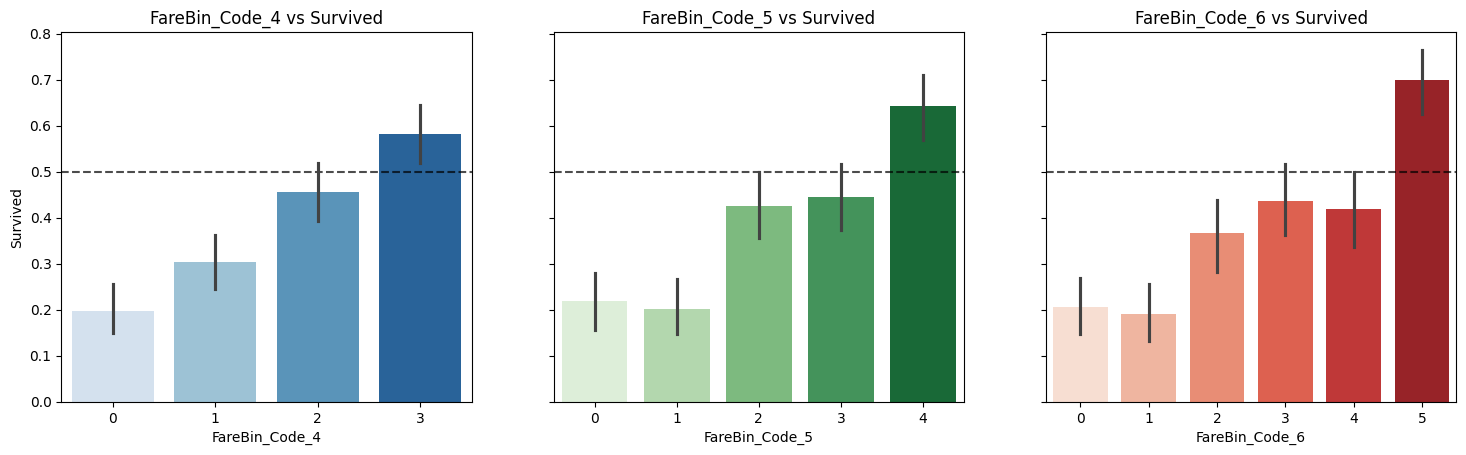

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 確保 df_train_2 已經被定義並包含 'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6' 和 'Survived' 欄位

# 繪製多個圖形
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(18)

for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5, linestyle='dashed', color='black', alpha=0.7)

# 使用 sns.barplot 並設置不同的 palette
sns.barplot(x='FareBin_Code_4', y='Survived', data=df_train_2, ax=ax1, palette='Blues')
sns.barplot(x='FareBin_Code_5', y='Survived', data=df_train_2, ax=ax2, palette='Greens')
sns.barplot(x='FareBin_Code_6', y='Survived', data=df_train_2, ax=ax3, palette='Reds')

# 設置標題
ax1.set_title('FareBin_Code_4 vs Survived')
ax2.set_title('FareBin_Code_5 vs Survived')
ax3.set_title('FareBin_Code_6 vs Survived')

plt.show()


In [ ]:
df_train_2.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare  ... Title_3_new_Mr Title_3_new_Mrs  \
0      0         A/5 21171   7.2500  ...              1               0   
1      0          PC 17599  71.2833  ...              0               1   
2      0  STON/O2. 3101282   7.9250  ...              0               0   

   Title_3_new_Officer  Title_3_new_Royalty        FareBin_4  \
0                    0                    0   (-0.001, 7.91]   
1                    0                    0  (31.0, 512.329]   
2                    0                    0   (7.91, 14.454]   

           FareBin_5          FareBin_6  FareBin_Code_4  FareBin_Code_5  \
0    (-0.001, 7.854]    (-0.001, 7.775]               0               0   
1  (39.688, 512.329]  (52.369, 512.329]               3               4   
2      (7.854, 10.5]     (7.775, 8.662]               1               1   

   FareBin_Code_6  
0               0  
1               5  
2               1  

[3 rows x 36 columns]

# 繪製關聯性圖

In [ ]:
# !pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# 0
# Sex_labeled

from scipy.stats import gaussian_kde

# 計算密度估計
sex_not_survived = df_train_2[df_train_2['Survived'] == 0]['Sex_labeled']
sex_survived = df_train_2[df_train_2['Survived'] == 1]['Sex_labeled']

kde_not_survived = gaussian_kde(sex_not_survived)
kde_survived = gaussian_kde(sex_survived)

# 設置範圍
sex_range = np.linspace(0, df_train_2['Sex_labeled'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(sex_range)
density_survived = kde_survived(sex_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sex_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sex_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Sex_labeled by Survival Status',
    xaxis_title='Sex_labeled',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [ ]:
# 0
# Embarked_labeled

from scipy.stats import gaussian_kde

# 計算密度估計
embarked_not_survived = df_train_2[df_train_2['Survived'] == 0]['Embarked_labeled']
embarked_survived = df_train_2[df_train_2['Survived'] == 1]['Embarked_labeled']

kde_not_survived = gaussian_kde(embarked_not_survived)
kde_survived = gaussian_kde(embarked_survived)

# 設置範圍
embarked_range = np.linspace(0, df_train_2['Embarked_labeled'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(embarked_range)
density_survived = kde_survived(embarked_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=embarked_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=embarked_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Embarked_labeled by Survival Status',
    xaxis_title='Embarked_labeled',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [ ]:
# 0
# Age
from scipy.stats import gaussian_kde

# 計算密度估計
age_not_survived = df_train[df_train['Survived'] == 0]['Age']
age_survived = df_train[df_train['Survived'] == 1]['Age']

kde_not_survived = gaussian_kde(age_not_survived)
kde_survived = gaussian_kde(age_survived)

# 設置範圍
age_range = np.linspace(0, df_train['Age'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(age_range)
density_survived = kde_survived(age_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Age by Survival Status',
    xaxis_title='Age',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [ ]:
# 0
# AgeGroup

from scipy.stats import gaussian_kde

# 計算密度估計
age_group_not_survived = df_train_2[df_train_2['Survived'] == 0]['AgeGroup']
age_group_survived = df_train_2[df_train_2['Survived'] == 1]['AgeGroup']

kde_not_survived = gaussian_kde(age_group_not_survived)
kde_survived = gaussian_kde(age_group_survived)

# 設置範圍
age_group_range = np.linspace(0, df_train_2['AgeGroup'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(age_group_range)
density_survived = kde_survived(age_group_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_group_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_group_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of AgeGroup by Survival Status',
    xaxis_title='AgeGroup',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [ ]:
# 0
# Family_size

from scipy.stats import gaussian_kde

# 計算密度估計
family_size_not_survived = df_train_2[df_train_2['Survived'] == 0]['Family_size']
family_size_survived = df_train_2[df_train_2['Survived'] == 1]['Family_size']

kde_not_survived = gaussian_kde(family_size_not_survived)
kde_survived = gaussian_kde(family_size_survived)

# 設置範圍
family_size_range = np.linspace(0, df_train_2['Family_size'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(family_size_range)
density_survived = kde_survived(family_size_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=family_size_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=family_size_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Family size by Survival Status',
    xaxis_title='Family size',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [ ]:
deplicate_ticket = []
for tk in df_train_2.Ticket.unique():
    tem = df_train_2.loc[df_train_2.Ticket == tk, 'Fare']

    if tem.count() > 1:
        deplicate_ticket.append(df_train_2.loc[df_train_2. Ticket == tk,['Name', 'Ticket', 'Fare','Cabin', 'Family_size', 'Survived']])

deplicate_ticket = pd.concat(deplicate_ticket)
deplicate_ticket_sorted = deplicate_ticket.sort_values(by='Family_size', ascending=False)
deplicate_ticket_sorted.head(30)

Name    Ticket     Fare  \
180                       Sage, Miss. Constance Gladys  CA. 2343  69.5500   
159                         Sage, Master. Thomas Henry  CA. 2343  69.5500   
201                                Sage, Mr. Frederick  CA. 2343  69.5500   
863                  Sage, Miss. Dorothy Edith "Dolly"  CA. 2343  69.5500   
792                            Sage, Miss. Stella Anna  CA. 2343  69.5500   
324                           Sage, Mr. George John Jr  CA. 2343  69.5500   
846                           Sage, Mr. Douglas Bullen  CA. 2343  69.5500   
480                     Goodwin, Master. Harold Victor   CA 2144  46.9000   
386                    Goodwin, Master. Sidney Leonard   CA 2144  46.9000   
71                          Goodwin, Miss. Lillian Amy   CA 2144  46.9000   
678            Goodwin, Mrs. Frederick (Augusta Tyler)   CA 2144  46.9000   
683                        Goodwin, Mr. Charles Edward   CA 2144  46.9000   
59                  Goodwin, Master. William Frederick   CA 2144  46.9000   
813                 Andersson, Miss. Ebba Iris Alfrida    347082  31.2750   
233                     Asplund, Miss. Lillian Gertrud    347077  31.3875   
182              Asplund, Master. Clarence Gustaf Hugo    347077  31.3875   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...    347077  31.3875   
850            Andersson, Master. Sigvard Harald Elias    347082  31.2750   
261                  Asplund, Master. Edvin Rojj Felix    347077  31.3875   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...    347082  31.2750   
541               Andersson, Miss. Ingeborg Constanzia    347082  31.2750   
119                  Andersson, Miss. Ellis Anna Maria    347082  31.2750   
542                  Andersson, Miss. Sigrid Elisabeth    347082  31.2750   
13                         Andersson, Mr. Anders Johan    347082  31.2750   
824                       Panula, Master. Urho Abraham   3101295  39.6875   
686                           Panula, Mr. Jaako Arnold   3101295  39.6875   
638             Panula, Mrs. Juha (Maria Emilia Ojala)   3101295  39.6875   
266                          Panula, Mr. Ernesti Arvid   3101295  39.6875   
16                                Rice, Master. Eugene    382652  29.1250   
634                                 Skoog, Miss. Mabel    347088  27.9000   

    Cabin  Family_size  Survived  
180   NaN           11         0  
159   NaN           11         0  
201   NaN           11         0  
863   NaN           11         0  
792   NaN           11         0  
324   NaN           11         0  
846   NaN           11         0  
480   NaN            8         0  
386   NaN            8         0  
71    NaN            8         0  
678   NaN            8         0  
683   NaN            8         0  
59    NaN            8         0  
813   NaN            7         0  
233   NaN            7         1  
182   NaN            7         0  
25    NaN            7         1  
850   NaN            7         0  
261   NaN            7         1  
610   NaN            7         0  
541   NaN            7         0  
119   NaN            7         0  
542   NaN            7         0  
13    NaN            7         0  
824   NaN            6         0  
686   NaN            6         0  
638   NaN            6         0  
266   NaN            6         0  
16    NaN            6         0  
634   NaN            6         0

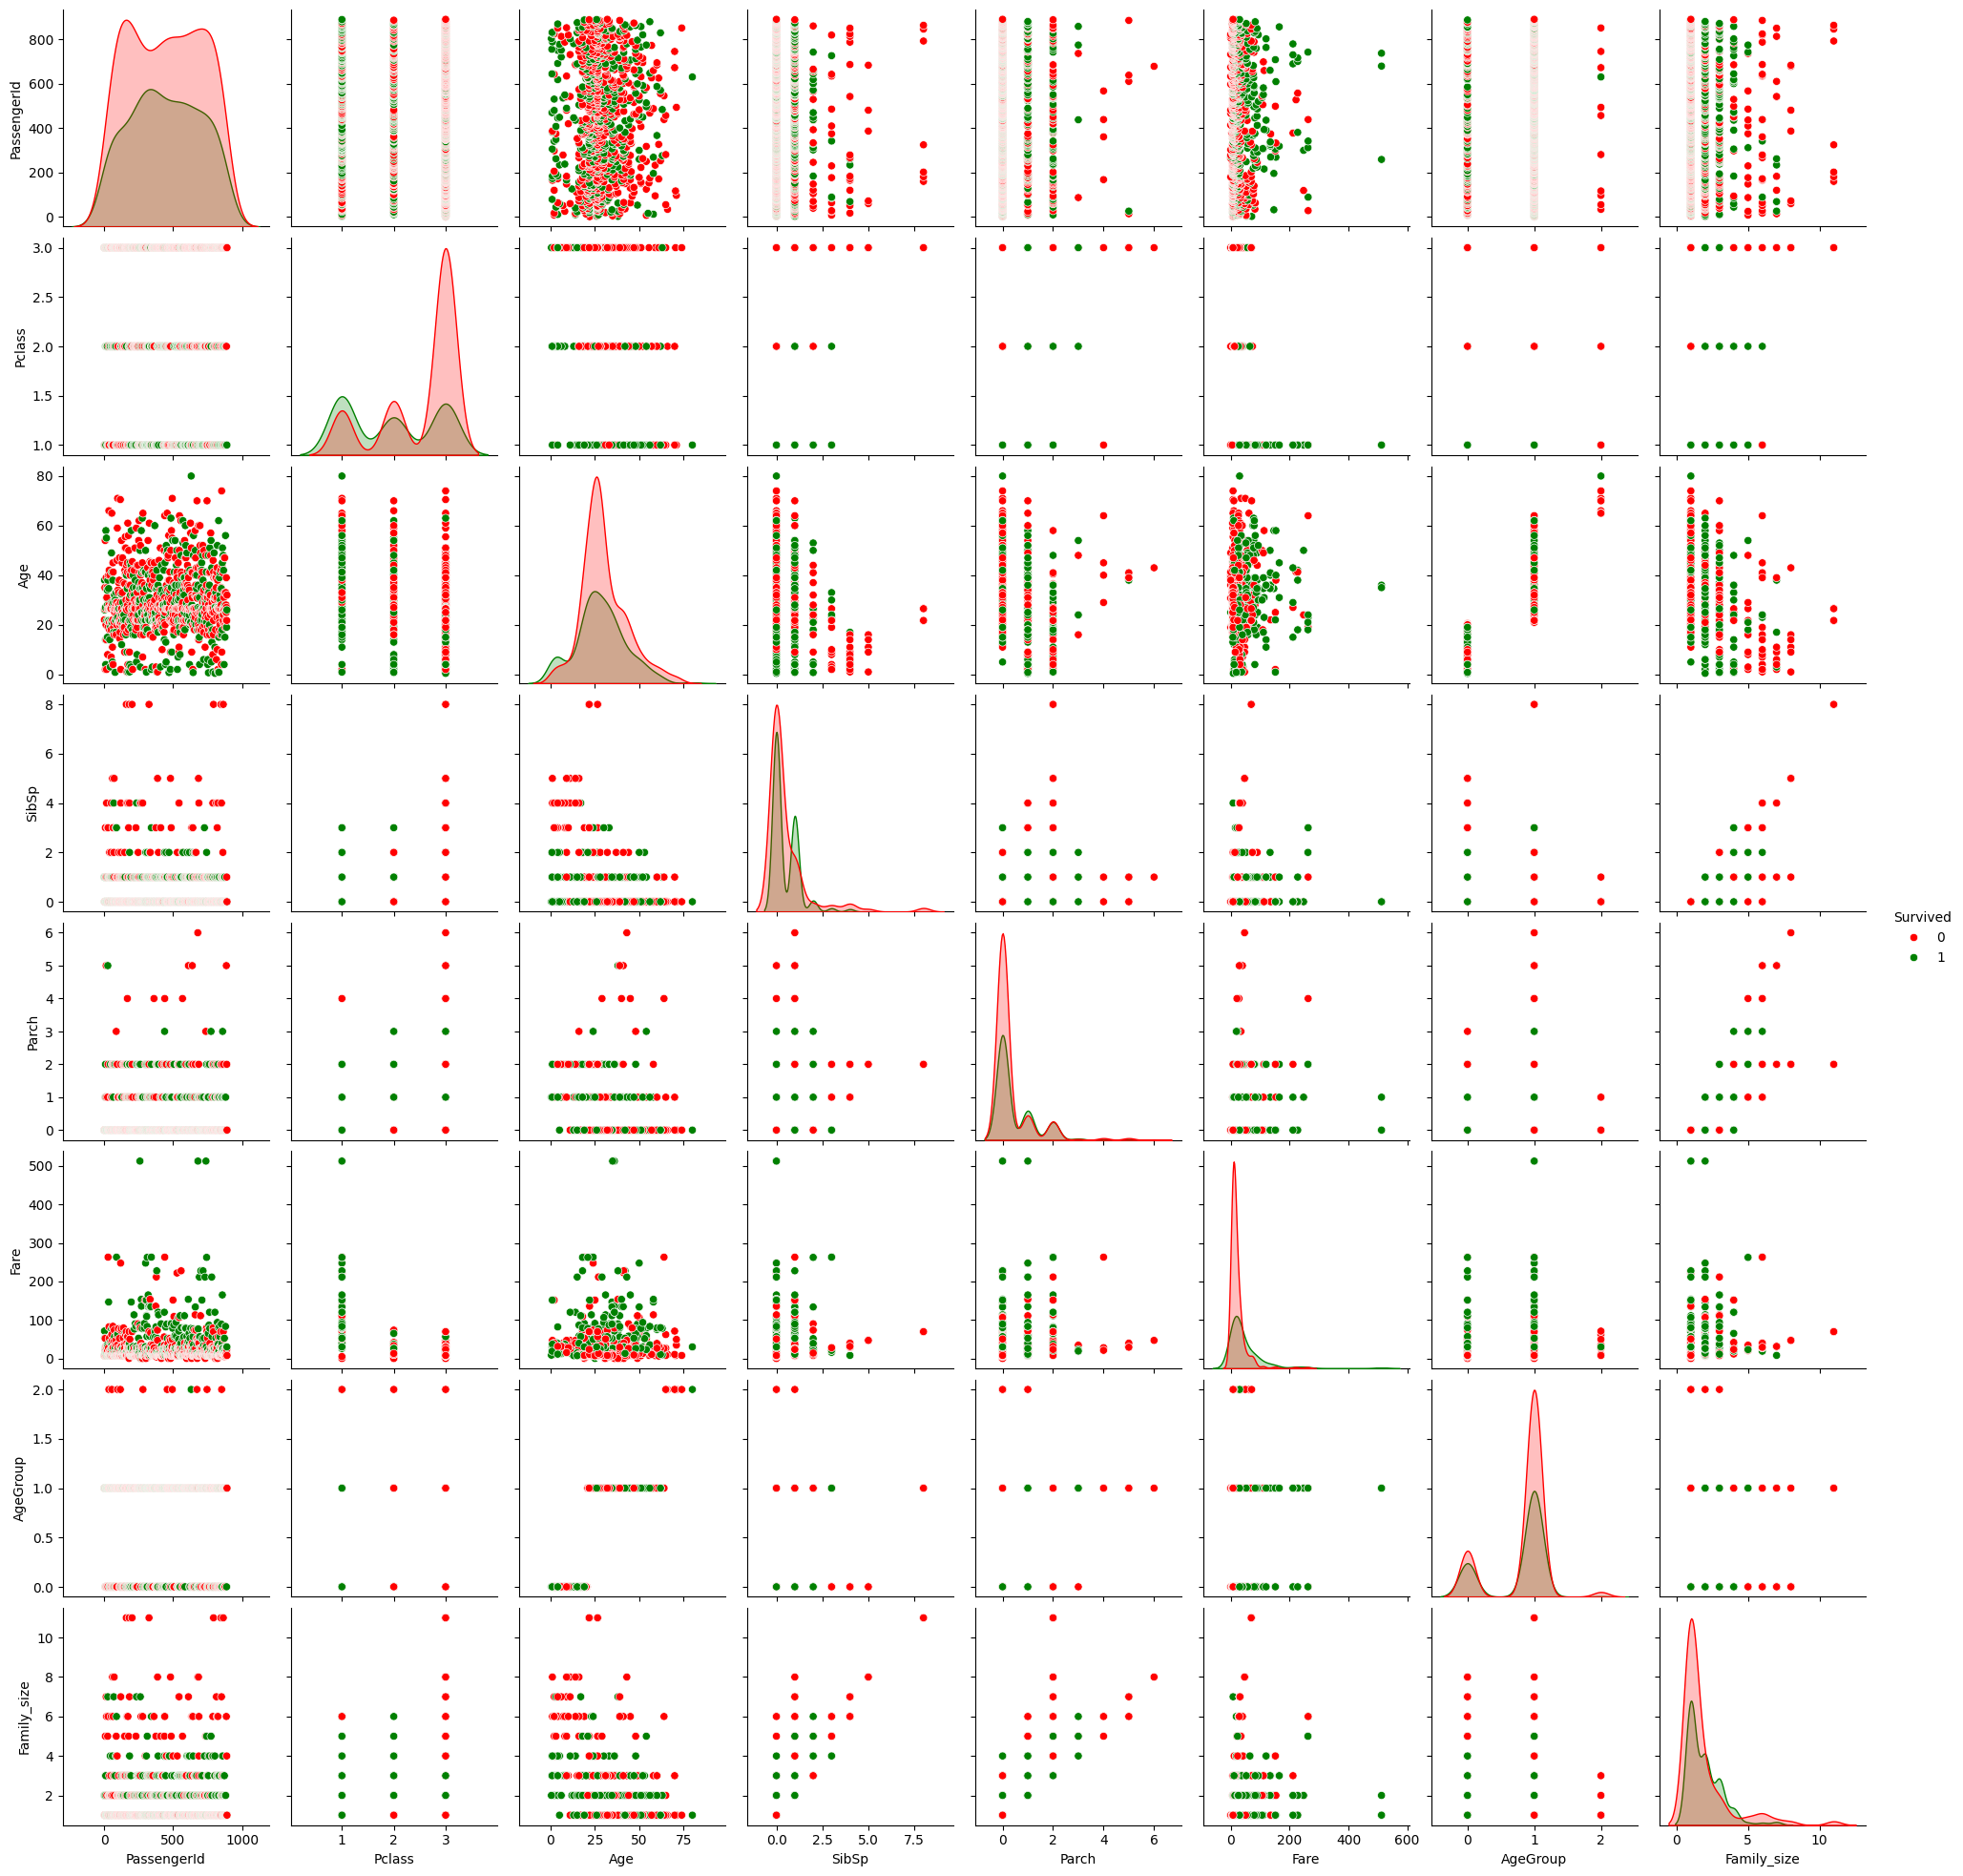

In [ ]:
# 查看關聯性
# 1

# 選取數值欄位
df_encoded = df_train.select_dtypes(include=[np.number])

palette = {0: "red", 1: "green"}

sb.pairplot(df_train, hue="Survived", palette=palette)

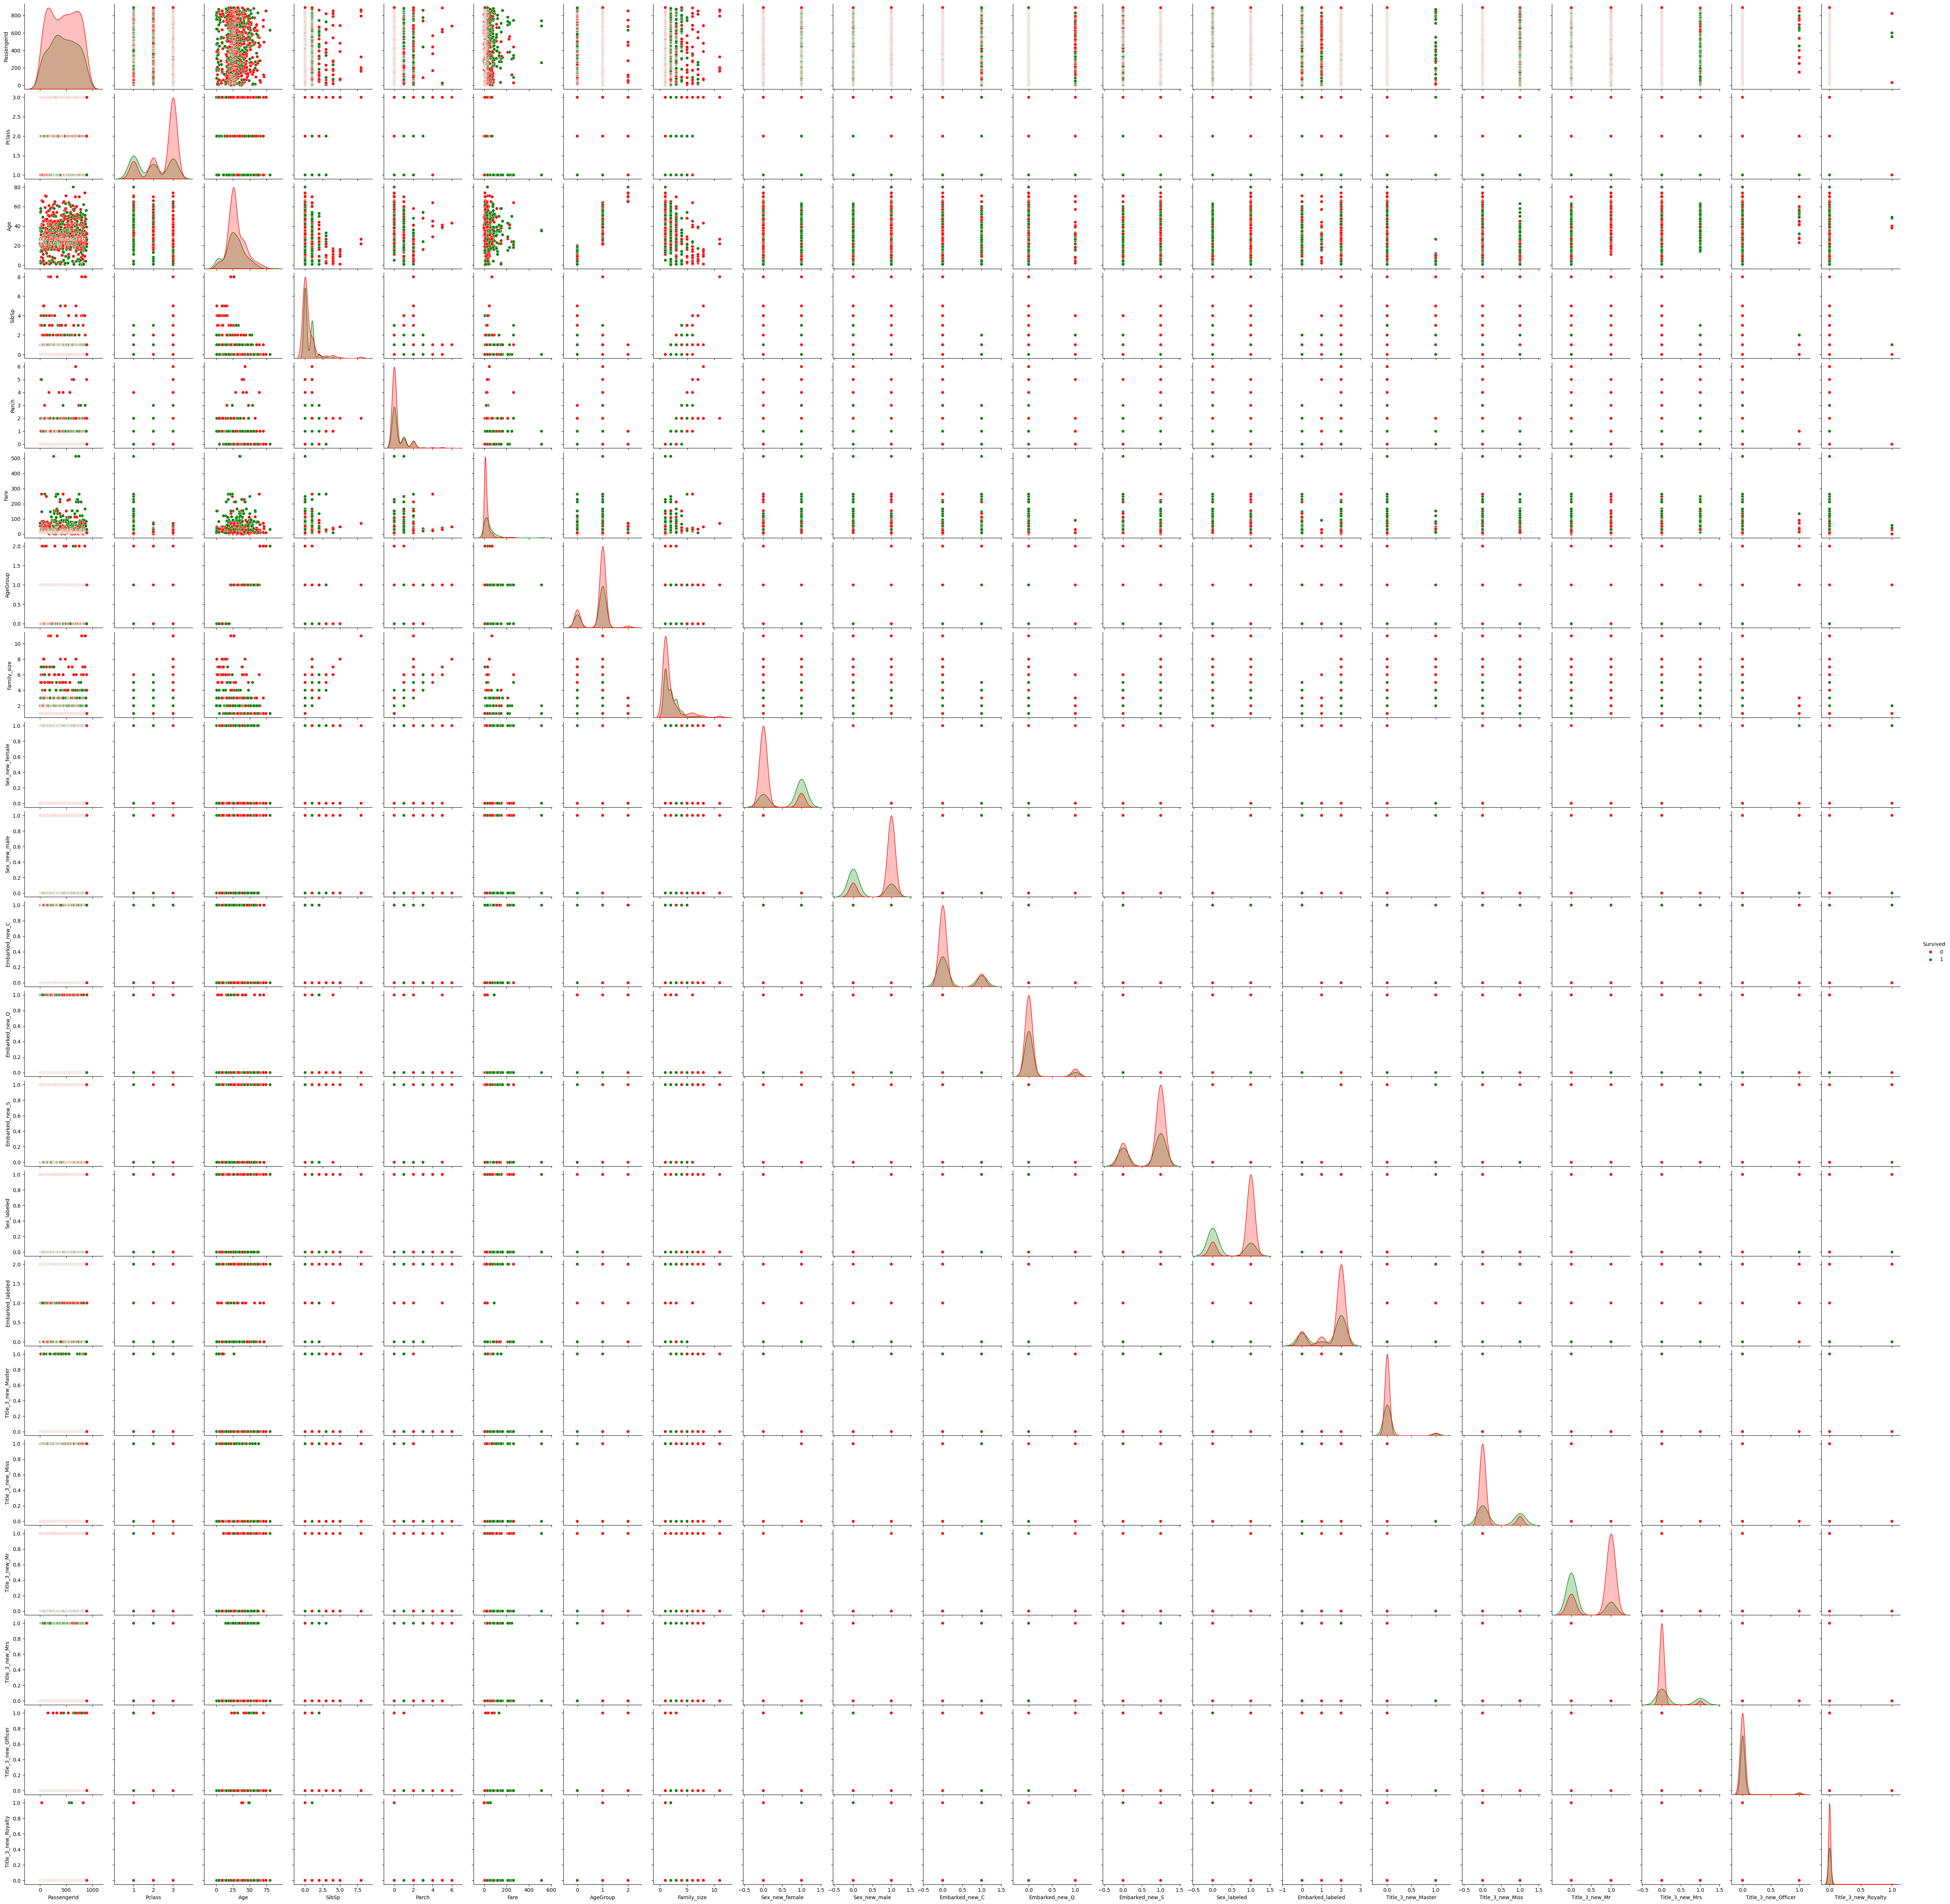

In [ ]:
# 1

# 選取數值欄位
df_encoded_2 = df_train_2.select_dtypes(include=[np.number])

palette = {0: "red", 1: "green"}

sb.pairplot(df_train_2, hue="Survived", palette=palette)

In [ ]:
# 2

# 選取數值欄位
df_encoded_2 = df_train_2.select_dtypes(include=[np.number])

# 相關係數矩陣
correlation_matrix = df_encoded_2.corr().round(2)


correlation_matrix

PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare  \
PassengerId                 1.00     -0.01   -0.04  0.04  -0.06  -0.00  0.01   
Survived                   -0.01      1.00   -0.34 -0.07  -0.04   0.08  0.26   
Pclass                     -0.04     -0.34    1.00 -0.41   0.08   0.02 -0.55   
Age                         0.04     -0.07   -0.41  1.00  -0.25  -0.18  0.12   
SibSp                      -0.06     -0.04    0.08 -0.25   1.00   0.41  0.16   
Parch                      -0.00      0.08    0.02 -0.18   0.41   1.00  0.22   
Fare                        0.01      0.26   -0.55  0.12   0.16   0.22  1.00   
AgeGroup                    0.01     -0.09   -0.17  0.69  -0.23  -0.23  0.02   
Family_size                -0.04      0.02    0.07 -0.26   0.89   0.78  0.22   
Sex_new_female             -0.04      0.54   -0.13 -0.11   0.11   0.25  0.18   
Sex_new_male                0.04     -0.54    0.13  0.11  -0.11  -0.25 -0.18   
Embarked_new_C             -0.00      0.17   -0.24  0.04  -0.06  -0.01  0.27   
Embarked_new_Q             -0.03      0.00    0.22 -0.08  -0.03  -0.08 -0.12   
Embarked_new_S              0.02     -0.15    0.07  0.02   0.07   0.06 -0.16   
Sex_labeled                 0.04     -0.54    0.13  0.11  -0.11  -0.25 -0.18   
Embarked_labeled            0.01     -0.17    0.16 -0.01   0.07   0.04 -0.22   
Title_3_new_Master         -0.03      0.09    0.08 -0.37   0.35   0.27  0.01   
Title_3_new_Miss           -0.07      0.33   -0.01 -0.28   0.08   0.10  0.12   
Title_3_new_Mr              0.04     -0.55    0.14  0.21  -0.25  -0.33 -0.18   
Title_3_new_Mrs             0.01      0.34   -0.15  0.16   0.06   0.22  0.11   
Title_3_new_Officer         0.06     -0.03   -0.15  0.18  -0.02  -0.05  0.01   
Title_3_new_Royalty         0.01      0.02   -0.11  0.07  -0.00  -0.03 -0.00   
FareBin_Code_4             -0.02      0.30   -0.63  0.12   0.39   0.39  0.58   
FareBin_Code_5             -0.00      0.32   -0.71  0.16   0.35   0.35  0.60   
FareBin_Code_6             -0.02      0.33   -0.70  0.15   0.36   0.36  0.61   

                     AgeGroup  Family_size  Sex_new_female  ...  \
PassengerId              0.01        -0.04           -0.04  ...   
Survived                -0.09         0.02            0.54  ...   
Pclass                  -0.17         0.07           -0.13  ...   
Age                      0.69        -0.26           -0.11  ...   
SibSp                   -0.23         0.89            0.11  ...   
Parch                   -0.23         0.78            0.25  ...   
Fare                     0.02         0.22            0.18  ...   
AgeGroup                 1.00        -0.27           -0.10  ...   
Family_size             -0.27         1.00            0.20  ...   
Sex_new_female          -0.10         0.20            1.00  ...   
Sex_new_male             0.10        -0.20           -1.00  ...   
Embarked_new_C           0.02        -0.05            0.08  ...   
Embarked_new_Q           0.06        -0.06            0.07  ...   
Embarked_new_S          -0.06         0.08           -0.12  ...   
Sex_labeled              0.10        -0.20           -1.00  ...   
Embarked_labeled        -0.04         0.07           -0.11  ...   
Title_3_new_Master      -0.36         0.37           -0.16  ...   
Title_3_new_Miss        -0.22         0.11            0.69  ...   
Title_3_new_Mr           0.22        -0.34           -0.87  ...   
Title_3_new_Mrs          0.11         0.15            0.55  ...   
Title_3_new_Officer      0.08        -0.04           -0.09  ...   
Title_3_new_Royalty      0.03        -0.02           -0.01  ...   
FareBin_Code_4          -0.05         0.47            0.24  ...   
FareBin_Code_5          -0.01         0.42            0.24  ...   
FareBin_Code_6          -0.03         0.43            0.25  ...   

                     Embarked_labeled  Title_3_new_Master  Title_3_new_Miss  \
PassengerId                      0.01               -0.03             -0.07   
Survived                        -0.17  

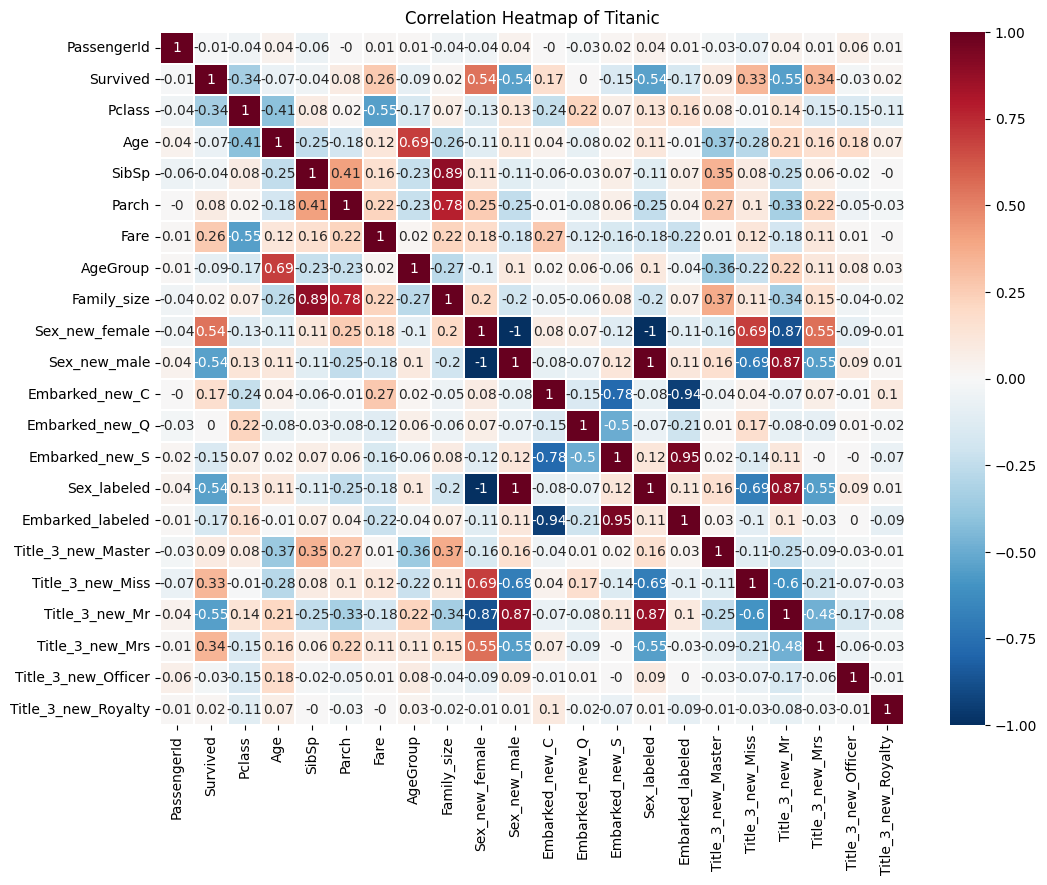

Survived               1.00
Sex_new_female         0.54
Title_3_new_Mrs        0.34
Title_3_new_Miss       0.33
Fare                   0.26
Embarked_new_C         0.17
Title_3_new_Master     0.09
Parch                  0.08
Title_3_new_Royalty    0.02
Family_size            0.02
Embarked_new_Q         0.00
PassengerId           -0.01
Title_3_new_Officer   -0.03
SibSp                 -0.04
Age                   -0.07
AgeGroup              -0.09
Embarked_new_S        -0.15
Embarked_labeled      -0.17
Pclass                -0.34
Sex_new_male          -0.54
Sex_labeled           -0.54
Title_3_new_Mr        -0.55
Name: Survived, dtype: float64


In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r',linewidths=0.2)
fig=plt.gcf()
plt.title("Correlation Heatmap of Titanic")
plt.show()

print(correlation_matrix['Survived'].sort_values(ascending=False))

# 性別: 女性 > 男性

# 艙等: 高艙等 > 低艙等
# 艙位等級與存活呈現負相關。1為一等艙，表示越高等級的艙位，存活率越高

# 票價: 高票價 > 低票價
# 票價與存活呈現正相關，票價越高，存活率越高

# 登船港口: Cherbourg > Southampton

# Parch 相關係數為 0.082，有父母或子女在船上的乘客，存活率略高

# SibSp 相關係數為 -0.035，有兄弟姐妹或配偶在船上的乘客，存活率的更低，但影響非常小

# Family_size 為 0.017，家庭成員總數與存活率幾乎沒有相關性

# 年齡組相關係數為 -0.088，年齡較大的乘客，存活率略低



In [ ]:
# 查看年齡分怖

## matplotlib
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df_train_2['Age'], color='skyblue')
# plt.title('Age Quartiles')
# plt.xlabel('Age')
# plt.show()


fig = px.box(df_train_2, y='Age', points='all', color_discrete_sequence=['blue'])

#
fig.update_layout(
    title='Age Quartiles',
    yaxis_title='Age',
    xaxis_title='',
    width=800,
    height=600
)

fig.show()

In [ ]:
# 3
# 各年齡組存活率

# agegroup_survival = df_train_2.groupby('AgeGroup')['Survived'].mean()

# #
# plt.figure(figsize=(10, 6))
# agegroup_survival.plot(kind='bar', color='skyblue')
# plt.title('Survival Rate by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Survival Rate')
# plt.xticks(rotation=0)
# plt.show()

# #
# print(agegroup_survival)



agegroup_survival = df_train_2.groupby('AgeGroup')['Survived'].mean().reset_index()

#
fig = px.bar(
    agegroup_survival,
    x='AgeGroup',
    y='Survived',
    title='Survival Rate by Age Group',
    labels={'Survived': 'Survival Rate', 'AgeGroup': 'Age Group'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()

In [ ]:
# 3
# 各年齡組存活率

agegroup_survival = df_train_2.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    agegroup_survival,
    x='AgeGroup',
    y='Survived',
    title='Survival Rate by AgeGroup and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'AgeGroup': 'AgeGroup'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()

In [ ]:
# 3
# 各年齡組存活人數

agegroup_survival_counts = df_train_2.groupby(['AgeGroup', 'Survived']).size().unstack()

# 顯示未存活的人數
trace1 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[0],
    name='Not Survived',
    marker_color='lightcoral'
)

# 顯示存活的人數
trace2 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[1],
    name='Survived',
    marker_color='lightgreen'
)

#
fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(barmode='group')

fig.update_layout(
    title='Passenger Count by Age Group and Survival Status',
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Survival Status',
    width=1000,
    height=600
)

fig.show()

#
print(agegroup_survival_counts)

Survived    0    1
AgeGroup          
0          98   82
1         441  259
2          10    1


In [ ]:
# 4
# 各艙等存活率

pclass_survival = df_train_2.groupby('Pclass')['Survived'].mean().reset_index()

#
fig = px.bar(
    pclass_survival,
    x='Pclass',
    y='Survived',
    title='Survival Rate by Pclass',
    labels={'Survived': 'Survival Rate', 'Pclass': 'Pclass'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [ ]:
# 4
# 各艙等存活率

# sns.countplot(x='Embarked', hue='Survived', data=df_train_2)
# plt.xlabel('Embarked')
# plt.ylabel('Count')
# plt.title('Survived count by Embarked')
# plt.show()



pclass_sex_survival = df_train_2.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    pclass_sex_survival,
    x='Pclass',
    y='Survived',
    title='Survival Rate by Pclass and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'Pclass': 'Pclass'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [ ]:
# 5
# 各港口存活率

embarked_survival = df_train_2.groupby('Embarked')['Survived'].mean().reset_index()

#
fig = px.bar(
    embarked_survival,
    x='Embarked',
    y='Survived',
    title='Survival Rate by Embarked',
    labels={'Survived': 'Survival Rate', 'Embarked': 'Embarked'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [ ]:
# 5
# 各港口存活率

embarked_survival = df_train_2.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    embarked_survival,
    x='Embarked',
    y='Survived',
    title='Survival Rate by Embarked and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'Embarked': 'Embarked'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


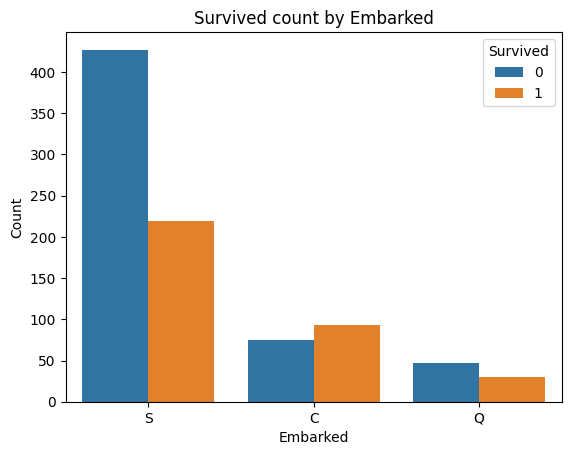

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=df_train_2)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survived count by Embarked')
plt.show()

In [ ]:
df_train_2['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

# 特徵重要性

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded_2.drop(['Survived'], axis=1)
y = df_encoded_2['Survived']

model = RandomForestClassifier()

model.fit(X, y)

# 特徵重要性
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                Feature  Importance
0           PassengerId    0.153990
5                  Fare    0.124234
2                   Age    0.123148
13          Sex_labeled    0.072315
9          Sex_new_male    0.069611
8        Sex_new_female    0.069315
17       Title_3_new_Mr    0.064865
1                Pclass    0.049437
7           Family_size    0.044107
23       FareBin_Code_6    0.037746
3                 SibSp    0.031668
22       FareBin_Code_5    0.026210
21       FareBin_Code_4    0.021103
4                 Parch    0.019132
6              AgeGroup    0.015175
15   Title_3_new_Master    0.013887
18      Title_3_new_Mrs    0.013596
16     Title_3_new_Miss    0.012600
14     Embarked_labeled    0.011851
10       Embarked_new_C    0.008870
12       Embarked_new_S    0.007507
11       Embarked_new_Q    0.005083
19  Title_3_new_Officer    0.003854
20  Title_3_new_Royalty    0.000695


# Baseline、ML

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


In [ ]:
df_encoded_2

PassengerId  Survived  Pclass    Age  SibSp  Parch     Fare  AgeGroup  \
0              1         0       3  22.00      1      0   7.2500         1   
1              2         1       1  38.00      1      0  71.2833         1   
2              3         1       3  26.00      0      0   7.9250         1   
3              4         1       1  35.00      1      0  53.1000         1   
4              5         0       3  35.00      0      0   8.0500         1   
..           ...       ...     ...    ...    ...    ...      ...       ...   
886          887         0       2  27.00      0      0  13.0000         1   
887          888         1       1  19.00      0      0  30.0000         0   
888          889         0       3  21.75      1      2  23.4500         1   
889          890         1       1  26.00      0      0  30.0000         1   
890          891         0       3  32.00      0      0   7.7500         1   

     Family_size  Sex_new_female  ...  Embarked_new_Q  Embarked_new_S  \
0              2               0  ...               0               1   
1              2               1  ...               0               0   
2              1               1  ...               0               1   
3              2               1  ...               0               1   
4              1               0  ...               0               1   
..           ...             ...  ...             ...             ...   
886            1               0  ...               0               1   
887            1               1  ...               0               1   
888            4               1  ...               0               1   
889            1               0  ...               0               0   
890            1               0  ...               1               0   

     Sex_labeled  Embarked_labeled  Title_3_new_Master  Title_3_new_Miss  \
0              1                 2                   0                 0   
1              0                 0                   0                 0   
2              0                 2                   0                 1   
3              0                 2                   0                 0   
4              1                 2                   0                 0   
..           ...               ...                 ...               ...   
886            1                 2                   0                 0   
887            0                 2                   0                 1   
888            0                 2                   0                 1   
889            1                 0                   0                 0   
890            1                 1                   0                 0   

     Title_3_new_Mr  Title_3_new_Mrs  Title_3_new_Officer  Title_3_new_Royalty  
0                 1                0                    0                    0  
1                 0                1                    0                    0  
2                 0                0                    0                    0  
3                 0                1                    0                    0  
4                 1                0                    0                    0  
..              ...              ...                  ...                  ...  
886               0                0                    1                    0  
887               0                0                    0                    0  
888               0                0                    0                    0  
889               1                0                    0                    0  
890               1                0                    0                    0  

[891 rows x 22 columns]

In [ ]:
df_encoded_2.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
AgeGroup               0
Family_size            0
Sex_new_female         0
Sex_new_male           0
Embarked_new_C         0
Embarked_new_Q         0
Embarked_new_S         0
Sex_labeled            0
Embarked_labeled       0
Title_3_new_Master     0
Title_3_new_Miss       0
Title_3_new_Mr         0
Title_3_new_Mrs        0
Title_3_new_Officer    0
Title_3_new_Royalty    0
dtype: int64

In [ ]:
df_encoded_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'AgeGroup', 'Family_size', 'Sex_new_female', 'Sex_new_male',
       'Embarked_new_C', 'Embarked_new_Q', 'Embarked_new_S', 'Sex_labeled',
       'Embarked_labeled', 'Title_3_new_Master', 'Title_3_new_Miss',
       'Title_3_new_Mr', 'Title_3_new_Mrs', 'Title_3_new_Officer',
       'Title_3_new_Royalty', 'FareBin_Code_4', 'FareBin_Code_5',
       'FareBin_Code_6'],
      dtype='object')

In [ ]:
# 查看準確度_all

columns_X = list(set(df_encoded_2.columns) - {'Survived','PassengerId', 'SibSp', 'Parch'})
columns_y = ['Survived']

train_X = df_encoded_2[columns_X]
train_y = df_encoded_2[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8271734354403364
0.7721737492938296
0.8024543343167408
0.6746218065407069
0.7385349318937919
0.7901512773837173
0.7901512773837173


In [ ]:
# 查看準確度_onehot

columns_X = list(set(df_encoded_2.columns) - {'Survived','PassengerId', 'SibSp', 'Parch','Sex_labeled','Embarked_labeled'})
columns_y = ['Survived']

train_X = df_encoded_2[columns_X]
train_y = df_encoded_2[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8271734354403364
0.7744272173749293
0.8047078023978408
0.6734982110350889
0.7329044002259746
0.7879103634423451
0.7879103634423451


In [ ]:
# 查看準確度_label

columns_X = list(set(df_encoded_2.columns) - {'Survived','PassengerId', 'SibSp', 'Parch','Sex_new_female', 'Sex_new_male',
       'Embarked_new_C', 'Embarked_new_Q', 'Embarked_new_S','FareBin_Code_4', 'FareBin_Code_5','FareBin_Code_6'})
columns_y = ['Survived']

train_X = df_encoded_2[columns_X]
train_y = df_encoded_2[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8293955181721172
0.7755508128805474
0.8091959073504489
0.6723746155294709
0.7194589165777415
0.7901198920343984
0.7901198920343984


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic_Regression',
          'Decision_Tree',
          'Random_Forest_Classifier',
          'Support_Vector_Machines',
          'KNN',
          'Gaussian_Naive_Baye',
          'Gradient_Boosting_Classifier'],
    'Score': [scores_log,
          scores_decision_tree,
          scores_rfc,
          scores_svc,
          scores_knn,
          scores_gaussian,
          scores_gradient]
    })

models

Model     Score
0           Logistic_Regression  0.829396
1                 Decision_Tree  0.781156
2      Random_Forest_Classifier  0.810320
3       Support_Vector_Machines  0.672375
4                           KNN  0.719459
5           Gaussian_Naive_Baye  0.790120
6  Gradient_Boosting_Classifier  0.790120

In [ ]:
# # 使用 GridSearchCV 找出 SVC 的最佳參數組合

# from sklearn.model_selection import GridSearchCV

# svc = SVC()
# Parameters = {
#     'C' : [ 1.5, 2, 2.5],
#     'gamma' : [0.05,0.1],
#     'kernel' : ['rbf']
# }

# clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
# clf.fit(train_X, train_y)
# print(clf.best_params_)
# # Result: C = 2, gamma = 0.1 if using Gaussian Kernel

# scores_7 = cross_val_score(svc, train_X, train_y.values.ravel(), cv=5,scoring='accuracy').mean()
# print(scores_7)

## 測試集

In [ ]:
url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/test.csv'

df_test = pd.read_csv(url)

df_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [ ]:
# 處理資料

print(df_test.info())
print()
print((df_test['Cabin'].isna().sum()/df_test.shape[0]*100).round(2))
print()
print(df_test.isna().sum())

# age 用性別、艙等平均補
# Cabin 刪除，缺少 77%
# Embarked 用眾數補
# Fare 用同 Pclass 均價補

# sex轉為One-Hot
# Embarked轉為One-Hot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

78.23

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Age，用性別、艙等平均補
df_test['Age'].fillna(value=df_test.groupby(['Sex','Pclass'])['Age'].transform('mean'),inplace=True)
df_test

C:\Users\catal\AppData\Local\Temp\ipykernel_24644\1716539726.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [ ]:
# Embarked，用眾數補
mode_embarked = df_test['Embarked'].mode()[0]

df_test['Embarked'].fillna(value=mode_embarked, inplace=True)
df_test

C:\Users\catal\AppData\Local\Temp\ipykernel_24644\2829690866.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [ ]:
# Fare 用同 Sex, Pclass 均價補
df_test['Fare'].fillna(value=df_test.groupby(['Sex','Pclass'])['Fare'].transform('mean'),inplace=True)
df_test

C:\Users\catal\AppData\Local\Temp\ipykernel_24644\2857589316.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [ ]:
# 年齡多一欄，設為年齡組

bins = [0, 21, 65, 100]
labels = ['0-21', '22-65', '66-100']

df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)
df_test['AgeGroup'] = df_test['AgeGroup'].cat.codes  # 轉換為數值

df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  
0          Q         1  
1          S         1  
2          Q         1  
3          S         1  
4          S         1  
..       ...       ...  
413        S         1  
414        C         1  
415        S         1  
416        S         1  
417        C         1  

[418 rows x 12 columns]

In [ ]:
# 家屬多設一欄，總親屬人數

df_test['Family_size']	= df_test['SibSp'].astype(int) + df_test['Parch'].astype(int)

df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  Family_size  
0          Q         1            0  
1          S         1            1  
2          Q         1            0  
3          S         1            0  
4          S         1            2  
..       ...       ...          ...  
413        S         1            0  
414        C         1            0  
415        S         1            0  
416        S         1            0  
417        C         1            2  

[418 rows x 13 columns]

In [ ]:
# df_test_2，複製一張表
# Sex、Embarked轉為One-Hot

df_test_2 = df_test.copy()
df_test_2['Sex_new'] = df_test_2['Sex'].copy()
df_test_2['Embarked_new'] = df_test_2['Embarked'].copy()
df_test_2 = pd.get_dummies(df_test_2, columns=['Sex_new', 'Embarked_new'], prefix=['Sex_new', 'Embarked_new'])

df_test_2['Sex_new_female'] = df_test_2['Sex_new_female'].astype(int)
df_test_2['Sex_new_male'] = df_test_2['Sex_new_male'].astype(int)
df_test_2['Embarked_new_C'] = df_test_2['Embarked_new_C'].astype(int)
df_test_2['Embarked_new_Q'] = df_test_2['Embarked_new_Q'].astype(int)
df_test_2['Embarked_new_S'] = df_test_2['Embarked_new_S'].astype(int)

df_test_2

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  Family_size  Sex_new_female  Sex_new_male  \
0          Q         1            0               0             1   
1          S         1            1               1             0   
2          Q         1            0               0             1   
3          S         1            0               0             1   
4          S         1            2               1             0   
..       ...       ...          ...             ...           ...   
413        S         1            0               0             1   
414        C         1            0               1             0   
415        S         1            0               0             1   
416        S         1            0               0             1   
417        C         1            2               0             1   

     Embarked_new_C  Embarked_new_Q  Embarked_new_S  
0                 0               1               0  
1                 0               0               1  
2                 0               1               0  
3                 0               0               1  
4                 0               0               1  
..              ...             ...             ...  
413               0               0               1  
414               1               0               0  
415               0               0               1  
416               0               0               1  
417               1               0               0  

[418 rows x 18 columns]

In [ ]:
# Sex、Embarked轉為LabelEncoder

# !pip install category_encoders
# from category_encoders.target_encoder import TargetEncoder
# target_encoder = TargetEncoder()
# df_train['Embarked'] = target_encoder.fit_transform(df_train['Embarked'])

from sklearn.preprocessing import LabelEncoder

label_encoder_sex_labeled = LabelEncoder()
df_test_2['Sex_labeled'] = label_encoder_sex_labeled.fit_transform(df_test_2['Sex'])

label_encoder_embarked_labeled = LabelEncoder()
df_test_2['Embarked_labeled'] = label_encoder_embarked_labeled.fit_transform(df_test_2['Embarked'])

df_test_2

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  Family_size  Sex_new_female  Sex_new_male  \
0          Q         1            0               0             1   
1          S         1            1               1             0   
2          Q         1            0               0             1   
3          S         1            0               0             1   
4          S         1            2               1             0   
..       ...       ...          ...             ...           ...   
413        S         1            0               0             1   
414        C         1            0               1             0   
415        S         1            0               0             1   
416        S         1            0               0             1   
417        C         1            2               0             1   

     Embarked_new_C  Embarked_new_Q  Embarked_new_S  Sex_labeled  \
0                 0               1               0            1   
1                 0               0               1            0   
2                 0               1               0            1   
3                 0               0               1            1   
4                 0               0               1            0   
..              ...             ...             ...          ...   
413               0               0               1            1   
414               1               0               0            0   
415               0               0               1            1   
416               0               0               1            1   
417               1               0               0            1   

     Embarked_labeled  
0                   1  
1                   2  
2                   1  
3                   2  
4                   2  
..                ...  
413                 2  
414                 0  
415                 2  
416                 2  
417                 0  

[418 rows x 20 columns]

In [ ]:
df_test_2['Title'] = df_test_2['Name'].str.split(", ", expand=True)[1]
df_test_2['Title_2'] = df_test_2['Title'].str.split(". ", expand=True)[0]

# Officer　專業人士：Captain、Colonel、Major、Doctor、Reverend
# Royalty　特殊地位：Jonkheer、Don、Sir、the Countess、Dona、Lady

title_encoding = {
  "Capt":"Officer",
  "Col":"Officer",
  "Major":"Officer",
  "Jonkheer":"Royalty",
  "Don":"Royalty",
  "Sir":"Royalty",
  "Dr":"Officer",
  "Rev": "Officer",
  "the Countess":"Royalty",
  "Dona":"Royalty",
  "Mme":"Mrs",
  "Mlle":"Miss",
  "Ms":"Mrs",
  "Mr":"Mr",
  "Mrs":"Mrs",
  "Miss":"Miss",
  "Master":"Master",
  "Lady":"Royalty"
}

df_test_2['Title_3'] = df_test_2['Title_2'].map(title_encoding)
df_test_2

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  ...  \
0      male  34.500000      0      0              330911    7.8292   NaN  ...   
1    female  47.000000      1      0              363272    7.0000   NaN  ...   
2      male  62.000000      0      0              240276    9.6875   NaN  ...   
3      male  27.000000      0      0              315154    8.6625   NaN  ...   
4    female  22.000000      1      1             3101298   12.2875   NaN  ...   
..      ...        ...    ...    ...                 ...       ...   ...  ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN  ...   
414  female  39.000000      0      0            PC 17758  108.9000  C105  ...   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN  ...   
416    male  24.525104      0      0              359309    8.0500   NaN  ...   
417    male  24.525104      1      1                2668   22.3583   NaN  ...   

    Sex_new_female  Sex_new_male  Embarked_new_C  Embarked_new_Q  \
0                0             1               0               1   
1                1             0               0               0   
2                0             1               0               1   
3                0             1               0               0   
4                1             0               0               0   
..             ...           ...             ...             ...   
413              0             1               0               0   
414              1             0               1               0   
415              0             1               0               0   
416              0             1               0               0   
417              0             1               1               0   

     Embarked_new_S  Sex_labeled  Embarked_labeled  \
0                 0            1                 1   
1                 1            0                 2   
2                 0            1                 1   
3                 1            1                 2   
4                 1            0                 2   
..              ...          ...               ...   
413               1            1                 2   
414               0            0                 0   
415               1            1                 2   
416               1            1                 2   
417               0            1                 0   

                                  Title  Title_2  Title_3  
0                             Mr. James       Mr       Mr  
1              Mrs. James (Ellen Needs)      Mrs      Mrs  
2                    Mr. Thomas Francis       Mr       Mr  
3                            Mr. Albert       Mr       Mr  
4    Mrs. Alexander (Helga E Lindqvist)      Mrs      Mrs  
..                                  ...      ...      ...  
413                           Mr. Woolf       Mr       Mr  
414                       Dona. Fermina     Dona  Royalty  
415                 Mr. Simon Sivertsen       Mr       Mr  
416                       Mr. Frederick       Mr       Mr  
417              

In [ ]:
# Title_3轉為One-Hot

df_test_2['Title_3_new'] = df_test_2['Title_3'].copy()
df_test_2 = pd.get_dummies(df_test_2, columns=['Title_3_new'], prefix=['Title_3_new'])

df_test_2['Title_3_new_Master'] = df_test_2['Title_3_new_Master'].astype(int)
df_test_2['Title_3_new_Miss'] = df_test_2['Title_3_new_Miss'].astype(int)
df_test_2['Title_3_new_Mr'] = df_test_2['Title_3_new_Mr'].astype(int)
df_test_2['Title_3_new_Mrs'] = df_test_2['Title_3_new_Mrs'].astype(int)
df_test_2['Title_3_new_Officer'] = df_test_2['Title_3_new_Officer'].astype(int)
df_test_2['Title_3_new_Royalty'] = df_test_2['Title_3_new_Royalty'].astype(int)

df_test_2

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  ...  \
0      male  34.500000      0      0              330911    7.8292   NaN  ...   
1    female  47.000000      1      0              363272    7.0000   NaN  ...   
2      male  62.000000      0      0              240276    9.6875   NaN  ...   
3      male  27.000000      0      0              315154    8.6625   NaN  ...   
4    female  22.000000      1      1             3101298   12.2875   NaN  ...   
..      ...        ...    ...    ...                 ...       ...   ...  ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN  ...   
414  female  39.000000      0      0            PC 17758  108.9000  C105  ...   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN  ...   
416    male  24.525104      0      0              359309    8.0500   NaN  ...   
417    male  24.525104      1      1                2668   22.3583   NaN  ...   

    Embarked_labeled                               Title  Title_2  Title_3  \
0                  1                           Mr. James       Mr       Mr   
1                  2            Mrs. James (Ellen Needs)      Mrs      Mrs   
2                  1                  Mr. Thomas Francis       Mr       Mr   
3                  2                          Mr. Albert       Mr       Mr   
4                  2  Mrs. Alexander (Helga E Lindqvist)      Mrs      Mrs   
..               ...                                 ...      ...      ...   
413                2                           Mr. Woolf       Mr       Mr   
414                0                       Dona. Fermina     Dona  Royalty   
415                2                 Mr. Simon Sivertsen       Mr       Mr   
416                2                       Mr. Frederick       Mr       Mr   
417                0                   Master. Michael J   Master   Master   

     Title_3_new_Master  Title_3_new_Miss  Title_3_new_Mr  Title_3_new_Mrs  \
0                     0                 0               1                0   
1                     0                 0               0                1   
2                     0                 0               1                0   
3                     0                 0               1                0   
4                     0                 0               0                1   
..                  ...               ...             ...              ...   
413                   0                 0               1                0   
414                   0                 0               0                0   
415                   0                 0               1                0   
416                   0                 0               1                0   
417                   1                 0               0                0   

     Title_3_new_Officer  Title_3_new_Royalty  
0                      0                    0  
1                      0                    0  
2                      0                    0  
3                      0                    0  
4                      0     

In [ ]:
df_encoded_test = df_test.select_dtypes(include=[np.number])
df_encoded_test

df_encoded_test_2 = df_test_2.select_dtypes(include=[np.number])
df_encoded_test_2

PassengerId  Pclass        Age  SibSp  Parch      Fare  AgeGroup  \
0            892       3  34.500000      0      0    7.8292         1   
1            893       3  47.000000      1      0    7.0000         1   
2            894       2  62.000000      0      0    9.6875         1   
3            895       3  27.000000      0      0    8.6625         1   
4            896       3  22.000000      1      1   12.2875         1   
..           ...     ...        ...    ...    ...       ...       ...   
413         1305       3  24.525104      0      0    8.0500         1   
414         1306       1  39.000000      0      0  108.9000         1   
415         1307       3  38.500000      0      0    7.2500         1   
416         1308       3  24.525104      0      0    8.0500         1   
417         1309       3  24.525104      1      1   22.3583         1   

     Family_size  Sex_new_female  Sex_new_male  ...  Embarked_new_Q  \
0              0               0             1  ...               1   
1              1               1             0  ...               0   
2              0               0             1  ...               1   
3              0               0             1  ...               0   
4              2               1             0  ...               0   
..           ...             ...           ...  ...             ...   
413            0               0             1  ...               0   
414            0               1             0  ...               0   
415            0               0             1  ...               0   
416            0               0             1  ...               0   
417            2               0             1  ...               0   

     Embarked_new_S  Sex_labeled  Embarked_labeled  Title_3_new_Master  \
0                 0            1                 1                   0   
1                 1            0                 2                   0   
2                 0            1                 1                   0   
3                 1            1                 2                   0   
4                 1            0                 2                   0   
..              ...          ...               ...                 ...   
413               1            1                 2                   0   
414               0            0                 0                   0   
415               1            1                 2                   0   
416               1            1                 2                   0   
417               0            1                 0                   1   

     Title_3_new_Miss  Title_3_new_Mr  Title_3_new_Mrs  Title_3_new_Officer  \
0                   0               1                0                    0   
1                   0               0                1                    0   
2                   0               1                0                    0   
3                   0               1                0                    0   
4                   0               0                1                    0   
..                ...             ...              ...                  ...   
413                 0               1                0                    0   
414                 0               0                0                    0   
415                 0               1                0                    0   
416                 0               1                0                    0   
417                 0               0                0                    0   

     Title_3_new_Royalty  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
413                    0  
414                    1  
415                    0  
416                    0  
417                    0  

[418 rows x 21 columns]

In [ ]:
print(f"train : {df_encoded_2.columns}")

print(f"test : {df_encoded_test_2.columns}")

train : Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'AgeGroup', 'Family_size', 'Sex_new_female', 'Sex_new_male',
       'Embarked_new_C', 'Embarked_new_Q', 'Embarked_new_S', 'Sex_labeled',
       'Embarked_labeled', 'Title_3_new_Master', 'Title_3_new_Miss',
       'Title_3_new_Mr', 'Title_3_new_Mrs', 'Title_3_new_Officer',
       'Title_3_new_Royalty', 'FareBin_Code_4', 'FareBin_Code_5',
       'FareBin_Code_6'],
      dtype='object')
test : Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeGroup',
       'Family_size', 'Sex_new_female', 'Sex_new_male', 'Embarked_new_C',
       'Embarked_new_Q', 'Embarked_new_S', 'Sex_labeled', 'Embarked_labeled',
       'Title_3_new_Master', 'Title_3_new_Miss', 'Title_3_new_Mr',
       'Title_3_new_Mrs', 'Title_3_new_Officer', 'Title_3_new_Royalty'],
      dtype='object')


In [ ]:
df_encoded_test_2.isna().sum()

PassengerId            0
Pclass                 0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
AgeGroup               0
Family_size            0
Sex_new_female         0
Sex_new_male           0
Embarked_new_C         0
Embarked_new_Q         0
Embarked_new_S         0
Sex_labeled            0
Embarked_labeled       0
Title_3_new_Master     0
Title_3_new_Miss       0
Title_3_new_Mr         0
Title_3_new_Mrs        0
Title_3_new_Officer    0
Title_3_new_Royalty    0
dtype: int64

In [ ]:
# 模型

columns_X = list(set(df_encoded_2.columns) - {'Survived','PassengerId', 'SibSp', 'Parch','FareBin_Code_4','FareBin_Code_5','FareBin_Code_6'})
columns_y = ['Survived']


train_X = df_encoded_2[columns_X]
train_y = df_encoded_2[columns_y]

In [ ]:
columns_test_X = list(set(df_encoded_test_2.columns) - {'PassengerId', 'SibSp', 'Parch'})

test_X = df_encoded_test_2[columns_test_X]

In [ ]:
# Random_Forest_Classifier

train_X = train_X[test_X.columns]

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_X, train_y)

test_y_list = rfc.predict(test_X)

df_encoded_test_2['Survived_pred'] = test_y_list

df_encoded_test_2.head()



c:\Users\catal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



PassengerId  Pclass   Age  SibSp  Parch     Fare  AgeGroup  Family_size  \
0          892       3  34.5      0      0   7.8292         1            0   
1          893       3  47.0      1      0   7.0000         1            1   
2          894       2  62.0      0      0   9.6875         1            0   
3          895       3  27.0      0      0   8.6625         1            0   
4          896       3  22.0      1      1  12.2875         1            2   

   Sex_new_female  Sex_new_male  ...  Embarked_new_S  Sex_labeled  \
0               0             1  ...               0            1   
1               1             0  ...               1            0   
2               0             1  ...               0            1   
3               0             1  ...               1            1   
4               1             0  ...               1            0   

   Embarked_labeled  Title_3_new_Master  Title_3_new_Miss  Title_3_new_Mr  \
0                 1                   0                 0               1   
1                 2                   0                 0               0   
2                 1                   0                 0               1   
3                 2                   0                 0               1   
4                 2                   0                 0               0   

   Title_3_new_Mrs  Title_3_new_Officer  Title_3_new_Royalty  Survived_pred  
0                0                    0                    0              0  
1                1                    0                    0              1  
2                0                    0                    0              0  
3                0                    0                    0              1  
4                1                    0                    0              1  

[5 rows x 22 columns]

In [ ]:
test_y = df_encoded_test_2[['Survived_pred']]
test_y

Survived_pred
0                0
1                1
2                0
3                1
4                1
..             ...
413              0
414              1
415              0
416              0
417              1

[418 rows x 1 columns]

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(891, 18)
(891, 1)
(418, 18)
(418, 1)


# 測試集真實結果

In [ ]:
url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/gender_submission.csv'

df_test_result = pd.read_csv(url)

df_test_result.head(10)

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0

In [ ]:
df_test_total = pd.merge(df_encoded_test_2, df_test_result, on='PassengerId')
df_test_total

PassengerId  Pclass        Age  SibSp  Parch      Fare  AgeGroup  \
0            892       3  34.500000      0      0    7.8292         1   
1            893       3  47.000000      1      0    7.0000         1   
2            894       2  62.000000      0      0    9.6875         1   
3            895       3  27.000000      0      0    8.6625         1   
4            896       3  22.000000      1      1   12.2875         1   
..           ...     ...        ...    ...    ...       ...       ...   
413         1305       3  24.525104      0      0    8.0500         1   
414         1306       1  39.000000      0      0  108.9000         1   
415         1307       3  38.500000      0      0    7.2500         1   
416         1308       3  24.525104      0      0    8.0500         1   
417         1309       3  24.525104      1      1   22.3583         1   

     Family_size  Sex_new_female  Sex_new_male  ...  Sex_labeled  \
0              0               0             1  ...            1   
1              1               1             0  ...            0   
2              0               0             1  ...            1   
3              0               0             1  ...            1   
4              2               1             0  ...            0   
..           ...             ...           ...  ...          ...   
413            0               0             1  ...            1   
414            0               1             0  ...            0   
415            0               0             1  ...            1   
416            0               0             1  ...            1   
417            2               0             1  ...            1   

     Embarked_labeled  Title_3_new_Master  Title_3_new_Miss  Title_3_new_Mr  \
0                   1                   0                 0               1   
1                   2                   0                 0               0   
2                   1                   0                 0               1   
3                   2                   0                 0               1   
4                   2                   0                 0               0   
..                ...                 ...               ...             ...   
413                 2                   0                 0               1   
414                 0                   0                 0               0   
415                 2                   0                 0               1   
416                 2                   0                 0               1   
417                 0                   1                 0               0   

     Title_3_new_Mrs  Title_3_new_Officer  Title_3_new_Royalty  Survived_pred  \
0                  0                    0                    0              0   
1                  1                    0                    0              1   
2                  0                    0                    0              0   
3                  0                    0                    0              1   
4                  1                    0                    0              1   
..               ...                  ...                  ...            ...   
413                0                    0                    0              0   
414                0                    0                    1              1   
415                0                    0                    0              0   
416                0                    0                    0              0   
417                0                    0                    0              1   

     Survived  
0           0  
1           1  
2           0  
3           0  
4           1  
..        ...  
413         0  
414         1  
415         0  
416         0  
417         0  

[418 rows x 23 columns]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_test_total['Survived'], df_test_total['Survived_pred'])
print(f"Accuracy: {accuracy}")

Accuracy: 0.8397129186602871


## 神經網絡，計算每個訓練和迭代的損失

In [ ]:
# TensorFlow, to_categorical ，目標變數進行獨熱編碼

import tensorflow as tf

train_y_onehot = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y_onehot = tf.keras.utils.to_categorical(test_y, num_classes=2)

print(train_y_onehot.shape)
print(test_y_onehot.shape)


(891, 2)
(418, 2)


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)    #  input_size 維度的輸入，輸出 hidden_size  # 線性層
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)   #  hidden_size 維度的輸入，同樣輸出 hidden_size 維度的特徵
        self.predict = torch.nn.Linear(hidden_size, output_size)   # hidden_size 維度的特徵映射到 output_size 維度，用於預測目標類別

    def forward(self, x):
        output1 = F.relu(self.hidden1(x))
        output2 = F.relu(self.hidden2(output1))
        output = self.predict(output2)
        return output

# 模型、優化器初始化
model = Model(test_X.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # 使用 momentum 來加速訓練
loss_func = torch.nn.CrossEntropyLoss()  # 多類別分類問題的損失函數

# 資料格式轉換為 torch 張量
train_X_data = torch.tensor(train_X.values, dtype=torch.float32)
train_y_data = torch.tensor(train_y.values.ravel(), dtype=torch.long)  # 使用 ravel() 攤平成一維
test_X_data = torch.tensor(test_X.values, dtype=torch.float32)
test_y_data = torch.tensor(test_y.values.ravel(), dtype=torch.long)  # 使用 ravel() 攤平成一維


batch_size = 64
num_epochs = 150
num_batches = len(train_X) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(train_X_data[start:end])
        loss = loss_func(prediction, train_y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 計算訓練集的損失
    loss = loss_func(model(train_X_data), train_y_data)
    loss_list.append(loss.item())

    # 計算測試集的損失
    test_loss = loss_func(model(test_X_data), test_y_data)
    test_loss_list.append(test_loss.item())

    # 每個 epoch 打印訓練和測試損失
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# 訓練完成後，評估模型準確率
model.eval()
with torch.no_grad():
    train_predictions = torch.argmax(model(train_X_data), dim=1).numpy()
    test_predictions = torch.argmax(model(test_X_data), dim=1).numpy()

train_accuracy = accuracy_score(train_y, train_predictions)
test_accuracy = accuracy_score(test_y_data, test_predictions)

print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch [1/150], Train Loss: 0.6592, Test Loss: 0.7212
Epoch [2/150], Train Loss: 0.6090, Test Loss: 0.6333
Epoch [3/150], Train Loss: 0.6217, Test Loss: 0.6574
Epoch [4/150], Train Loss: 0.5959, Test Loss: 0.6051
Epoch [5/150], Train Loss: 0.5923, Test Loss: 0.6098
Epoch [6/150], Train Loss: 0.5881, Test Loss: 0.6010
Epoch [7/150], Train Loss: 0.5830, Test Loss: 0.5968
Epoch [8/150], Train Loss: 0.5778, Test Loss: 0.5939
Epoch [9/150], Train Loss: 0.5716, Test Loss: 0.5866
Epoch [10/150], Train Loss: 0.5665, Test Loss: 0.5810
Epoch [11/150], Train Loss: 0.5764, Test Loss: 0.5871
Epoch [12/150], Train Loss: 0.5893, Test Loss: 0.5976
Epoch [13/150], Train Loss: 0.5562, Test Loss: 0.5665
Epoch [14/150], Train Loss: 0.5423, Test Loss: 0.5517
Epoch [15/150], Train Loss: 0.5404, Test Loss: 0.5410
Epoch [16/150], Train Loss: 0.5767, Test Loss: 0.5770
Epoch [17/150], Train Loss: 0.5215, Test Loss: 0.5226
Epoch [18/150], Train Loss: 0.5172, Test Loss: 0.5263
Epoch [19/150], Train Loss: 0.5416, T

Text(0, 0.5, 'BCE Loss')

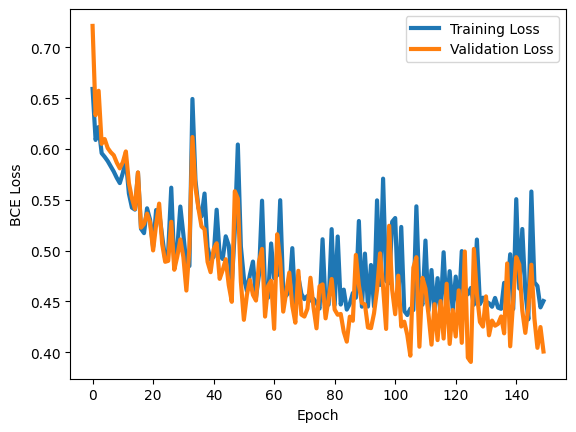

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [ ]:
x_test_data = torch.tensor(test_X.values, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(test_y, y_pred.detach().numpy()) # accuracy

0.8205741626794258